# Visualiser avec Matplotlib

Données OpenAlex

Nettoyage pour ne garder que celles qui mentionnent vraiment les sciences sociales computationnelles

In [1]:
import pandas as pd

df = pd.read_csv("../../data/CSS_exact_openalex.csv", low_memory=False)

In [4]:
df.head(2)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,locations.source.type,locations.source,sustainable_development_goals.id,sustainable_development_goals.display_name,sustainable_development_goals.score,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count
0,https://openalex.org/W2159397589,https://doi.org/10.1126/science.1167742,Computational Social Science,Computational Social Science,1318.19960,2009,2009-02-06,en,article,journal-article,...,journal|repository|repository|repository|repos...,nan|nan|nan|nan|nan,https://metadata.un.org/sdg/10,Reduced inequalities,0.45,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017|2...,41|114|168|146|219|273|254|250|257|220|277|267...
1,https://openalex.org/W2070907364,https://doi.org/10.1140/epjst/e2012-01697-8,Manifesto of computational social science,Manifesto of computational social science,488.98035,2012,2012-11-01,en,article,journal-article,...,journal|nan|repository|repository|repository|r...,nan|nan|nan|nan|nan|nan|nan|nan|nan|nan|nan|nan,https://metadata.un.org/sdg/3,Good health and well-being,0.47,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017|2...,4|22|41|35|47|33|33|38|24|32|36|30|19|4


In [12]:
df.shape

(1449, 183)

In [9]:
1#pd.to_datetime(df["publication_date"].iloc[10])

1

In [8]:
df["date"] = pd.to_datetime(df["publication_date"])


Sur un graphique :

    - Courbe d'évolution des publications
    - Courbe d'évolution des citations avec `cited_by_count`

Et sur un autre : 

    - Histogramme des citations

## Faire un histogramme avec Pandas

Et essayer de le rendre le plus beau possible

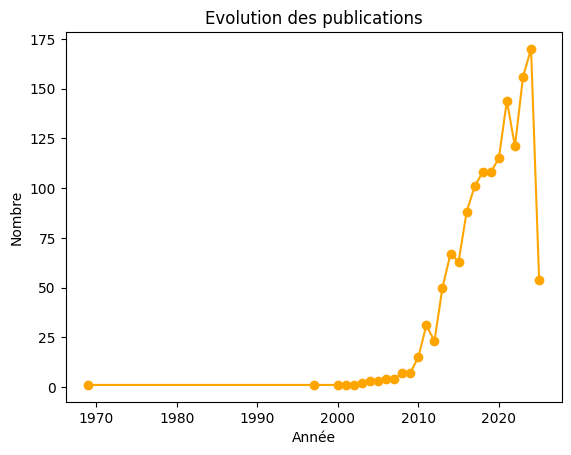

In [28]:
import matplotlib.pyplot as plt

# créer la figure
(df["publication_year"].value_counts()
 .sort_index()
 .plot(title="Evolution des publications", 
       ylabel="Nombre", 
       xlabel="Année",
       style="o-",
       color="orange")
       )

# sauver la figure
plt.savefig("graphique.png")


<Axes: title={'center': 'Evolution des publications'}, xlabel='Année', ylabel='Nombre'>

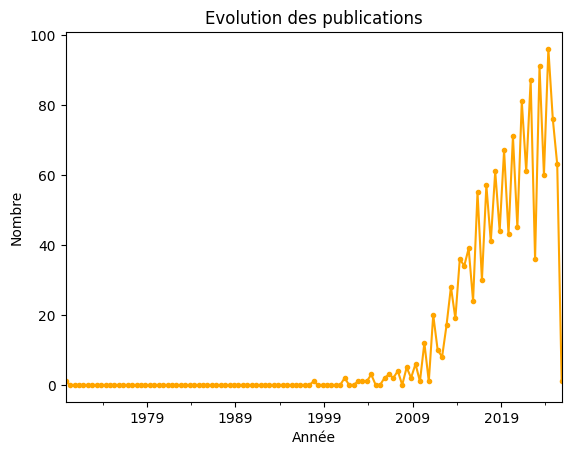

In [44]:
df.set_index("date").resample("6ME").size().plot(title="Evolution des publications", 
       ylabel="Nombre", 
       xlabel="Année",
       style=".-",
       color="orange")
       

## Faire un histogramme avec Matplotlib

- Définir la taille
- Ajouter titre / légende / labels
- gérer les marges
- gérer les couleurs
- sauvegarder la figure

In [45]:
import matplotlib.pyplot as plt

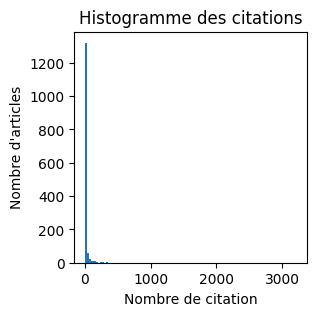

In [71]:
# je crée la figure vide
fig, ax = plt.subplots(1,1, figsize=(3, 3))

# je génère un axe avec Pandas et je le mets dans la figure précédente
df["cited_by_count"].hist(ax=ax, bins=100)

# on gère les paramètres
ax.set_title("Histogramme des citations")
ax.set_ylabel("Nombre d'articles")
ax.set_xlabel("Nombre de citation");
ax.grid(False)

# on sauve la figure
plt.savefig("histogramme.png")

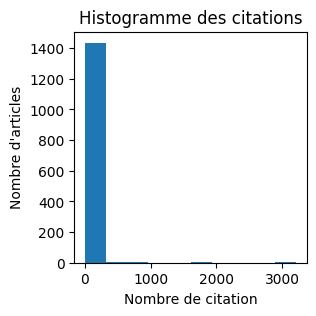

In [70]:
# je crée la figure vide
fig, ax = plt.subplots(1,1, figsize=(3, 3))

# je génère un axe avec Pandas et je le mets dans la figure précédente
plt.hist(df["cited_by_count"])

# on gère les paramètres
ax.set_title("Histogramme des citations")
ax.set_ylabel("Nombre d'articles")
ax.set_xlabel("Nombre de citation");

# on sauve la figure
plt.savefig("histogramme.png")

Ajouter une légende/annotation

- `ax.text`
- `ax.annotate`

## Deux figures côte à côte

Mettre les deux figures dans un même graphique

Aller plus avant : https://matplotlib.org/stable/users/explain/axes/arranging_axes.


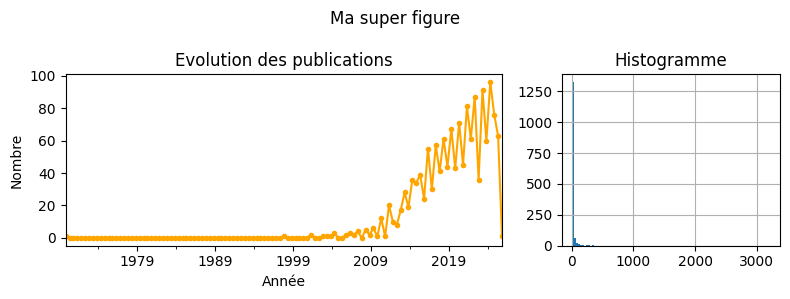

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(8, 3), 
                               gridspec_kw={'width_ratios': [2, 1]})

df.set_index("date").resample("6ME").size().plot(title="Evolution des publications", 
       ylabel="Nombre", 
       xlabel="Année",
       style=".-",
       color="orange",
        ax=ax1)
df["cited_by_count"].hist(ax=ax2, bins=100)

ax2.set_title("Histogramme")

plt.suptitle("Ma super figure")
plt.tight_layout()

plt.savefig("ma_figure_composée.png",dpi=400)


## Searbon & Matplotlib

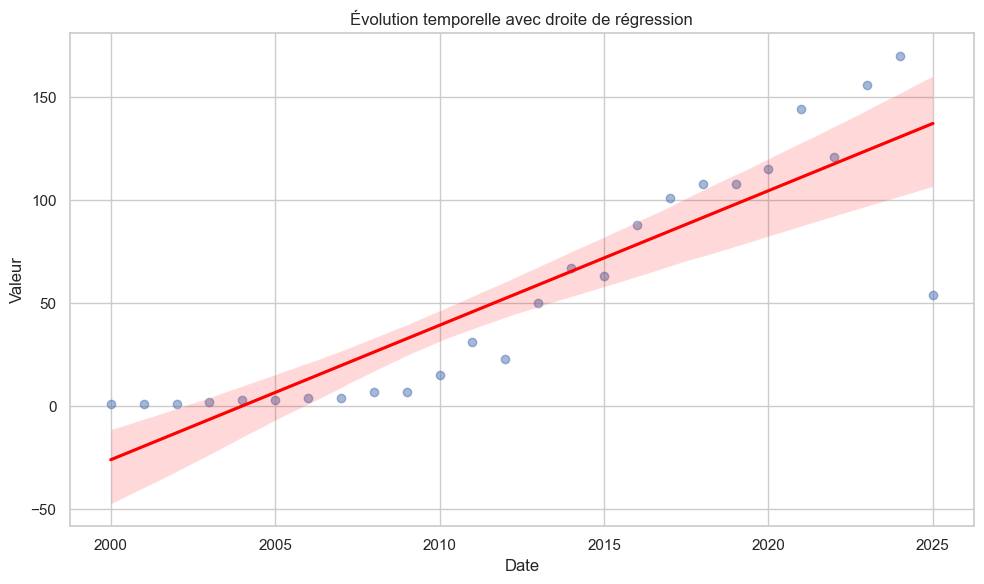

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# manipulation de données
table = df[df["publication_year"]>=2000]["publication_year"].value_counts().reset_index()

# option générales de seaborn (optionnel)
sns.set(style="whitegrid")

# créer une figure matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# ajouter la visualisation seaborn
sns.regplot(x='publication_year', 
            y='count', 
            data=table, 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'},
            ax=ax)


# ajouter des options
plt.title("Évolution temporelle avec droite de régression")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.tight_layout()
plt.show()